In [223]:
import os
os.environ['PYTHONHASHSEED']=str(1)
import json
import numpy as np
np.random.seed(1)
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

import pickle 

import tensorflow as tf
tf.random.set_random_seed(1)
import random
from tensorflow.keras import backend as K
from tensorflow import set_random_seed
#import tensorflow_io as tfio
#from tensorflow_addons.image import sparse_image_warp

In [20]:
np.random.seed(1)
a = [1,2,3,4,5]
np.random.shuffle(a)
print(a)


[3, 2, 5, 1, 4]


In [53]:
def reset_random_seeds():
    seed_value=1
    os.environ['PYTHONHASHSEED']=str(seed_value)
    tf.random.set_random_seed(seed_value)
    random.seed(seed_value)
    np.random.seed(seed_value)
    set_random_seed(seed_value)
    session_conf=tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
    sess=tf.Session(graph=tf.get_default_graph(),config=session_conf)
    K.set_session(sess)




In [102]:
DATASET_PATH= "MNIST-digit-sw-mfcc-norm-16.json"  #"MNIST-digit-en-0-mfcc.json" # "data_mfcc.json"

In [23]:
#load data
def load_data(dataset_path):
    with open(dataset_path,"r") as fp:
        data=json.load(fp)  #load the dictionary from the file
        
    # convert list into numpy array
    inputs=np.array(data["mfcc"])
    targets=np.array(data["labels"]) #.astype(int)
    #targets=gender_to_digit(targets)
    return inputs,targets

In [42]:
c,v=load_data(DATASET_PATH)

In [4]:
def gender_to_digit(y):
    for i in range(0,len(y)):
        if "male"==y[i]:
            y[i]="1"
        else:
            y[i]="0"
    return y

In [54]:
def prepare_datasets(test_size,validation_size):
    #load data
    X,y=load_data(DATASET_PATH)
    
    #create train/test split
    #split the data into train and test set
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=test_size)
    #create train/validation split
    X_train,X_validation,y_train,y_validation=train_test_split(X_train,y_train,test_size=validation_size)
    #3d array -> (130,13,1)
    X_train=X_train[...,np.newaxis] #4d array-> (num_samples,130,13,1)
    X_validation=X_validation[...,np.newaxis]
    X_test=X_test[...,np.newaxis]
    
    
    return X_train,X_validation,X_test,y_train,y_validation,y_test

In [79]:
def build_model(input_shape):
    #create model
    model=keras.Sequential()
    #1st conv layer
    model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape))
    model.add(keras.layers.MaxPool2D((3,3),strides=(2,2),padding='same'))
    model.add(keras.layers.BatchNormalization())
    
    #2nd conv layer
    model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape))
    model.add(keras.layers.MaxPool2D((3,3),strides=(2,2),padding='same'))
    model.add(keras.layers.BatchNormalization())
    
    #3rd conv layer
    model.add(keras.layers.Conv2D(32,(2,2),activation='relu',input_shape=input_shape))
    model.add(keras.layers.MaxPool2D((2,2),strides=(2,2),padding='same'))
    #model.add(keras.layers.BatchNormalization())
    
    #flatten the output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64,activation='relu'))
    model.add(keras.layers.Dropout(0.3,seed=1))
    
    #output layer softmax function
    model.add(keras.layers.Dense(10,activation='softmax'))
    
    return model

In [56]:
def predict(model,X,y):
    X=X[np.newaxis,...]
    
    # prediction =[[0.1,0.2,...]]
    prediction=model.predict(X) #X- >(1, 130,13,1)
    
    
    # extract index with max value
    predicted_index=np.argmax(prediction,axis=1) # [4]
    
    print("Expected index: {}, Predicted index: {}".format(y,predicted_index))
    
    

In [224]:

if __name__=="__main__":
    #inputs,targets=load_data(DATASET_PATH)
    
    reset_random_seeds()
    X_train,X_validation,X_test,y_train,y_validation,y_test=prepare_datasets(0.25,0.2)
    #create train, validation and test sets


In [225]:
print(y_train)

['7' '8' '7' ... '1' '1' '5']


In [33]:
print(y_train)

['1' '1' '0' ... '1' '1' '1']


In [228]:
#build the CNN net
reset_random_seeds()
input_shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3])
model=build_model(input_shape)
#compile the network
optimizer=keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
             loss="sparse_categorical_crossentropy",
             metrics=['acc'])
model.summary()

model.layers[0].get_weights()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 14, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 7, 32)         0         
_________________________________________________________________
batch_normalization_v1 (Batc (None, 31, 7, 32)         128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 5, 32)         9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 3, 32)         0         
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 15, 3, 32)         128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 2, 32)         4128      
__________

[array([[[[-0.03258064, -0.03923107, -0.01497506, -0.13095367,
            0.05619793,  0.10433422, -0.09973438,  0.09821762,
            0.06231214,  0.07526436, -0.03347087,  0.09731309,
           -0.00961411,  0.01493856,  0.03290623,  0.05378924,
           -0.11534296, -0.04505177,  0.02011031, -0.02303038,
            0.10101193,  0.00756796, -0.07064983, -0.0379236 ,
            0.08282979,  0.1382852 ,  0.02412863, -0.03306063,
            0.05231294,  0.13647385, -0.02904501,  0.08229612]],
 
         [[-0.07804831,  0.07558209, -0.05228055,  0.1079929 ,
           -0.06165206,  0.10377917,  0.01250887, -0.1346051 ,
            0.07560296,  0.06422621, -0.06370492, -0.06099454,
            0.00123976,  0.08460855, -0.08252673, -0.01703686,
            0.0231522 , -0.04956051,  0.1067982 , -0.05713806,
           -0.05500793, -0.08406467, -0.12412456, -0.05461141,
           -0.04419258,  0.09745553, -0.05410348, -0.03827928,
            0.06753378,  0.04154304,  0.04633307, -

In [164]:
print(X_test.shape)

(750, 64, 16, 1)


In [165]:
print(X_validation.shape)

(450, 64, 16, 1)


In [227]:
tf.reset_default_graph()

In [ ]:
#train the CNN
history=model.fit(X_train,y_train,validation_data=(X_validation,y_validation),batch_size=32,epochs=30)

Train on 1800 samples, validate on 450 samples
Epoch 1/30
1800/1800 [==============================] - 5s 3ms/sample - loss: 2.5091 - acc: 0.1172 - val_loss: 2.3037 - val_acc: 0.0844
Epoch 2/30
1800/1800 [==============================] - 4s 2ms/sample - loss: 2.1617 - acc: 0.2028 - val_loss: 2.3050 - val_acc: 0.1222
Epoch 3/30
1800/1800 [==============================] - 4s 2ms/sample - loss: 2.0295 - acc: 0.2744 - val_loss: 2.3042 - val_acc: 0.1178
Epoch 4/30
1800/1800 [==============================] - 4s 2ms/sample - loss: 1.8890 - acc: 0.3389 - val_loss: 2.3010 - val_acc: 0.1267
Epoch 5/30
1800/1800 [==============================] - 4s 2ms/sample - loss: 1.7474 - acc: 0.3911 - val_loss: 2.2820 - val_acc: 0.1689
Epoch 6/30
1800/1800 [==============================] - 4s 2ms/sample - loss: 1.6311 - acc: 0.4406 - val_loss: 2.2446 - val_acc: 0.1822
Epoch 7/30
1800/1800 [==============================] - 5s 3ms/sample - loss: 1.4961 - acc: 0.4967 - val_loss: 2.2099 - val_acc: 0.1178
E

In [214]:
#train the CNN
history=model.fit(X_train,y_train,validation_data=(X_validation,y_validation),batch_size=32,epochs=30)

Train on 1800 samples, validate on 450 samples
Epoch 1/30
1800/1800 [==============================] - 4s 2ms/sample - loss: 2.5091 - acc: 0.1172 - val_loss: 2.3037 - val_acc: 0.0844
Epoch 2/30
1800/1800 [==============================] - 4s 2ms/sample - loss: 2.1617 - acc: 0.2028 - val_loss: 2.3050 - val_acc: 0.1222
Epoch 3/30
1800/1800 [==============================] - 4s 2ms/sample - loss: 2.0295 - acc: 0.2744 - val_loss: 2.3042 - val_acc: 0.1178
Epoch 4/30
1800/1800 [==============================] - 5s 3ms/sample - loss: 1.8890 - acc: 0.3389 - val_loss: 2.3010 - val_acc: 0.1267
Epoch 5/30
1800/1800 [==============================] - 5s 3ms/sample - loss: 1.7474 - acc: 0.3911 - val_loss: 2.2820 - val_acc: 0.1689
Epoch 6/30
1800/1800 [==============================] - 4s 2ms/sample - loss: 1.6311 - acc: 0.4406 - val_loss: 2.2446 - val_acc: 0.1822
Epoch 7/30
1800/1800 [==============================] - 5s 3ms/sample - loss: 1.4961 - acc: 0.4967 - val_loss: 2.2099 - val_acc: 0.1178
E

In [129]:
#Evaluate the CNN on the test set-mel specaugment and not mel test set only
test_error,test_accuracy=model.evaluate(X_test,y_test,verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))

750/750 [==============================] - 0s 365us/sample - loss: 0.8436 - acc: 0.7067
Accuracy on test set is: 0.7066666483879089


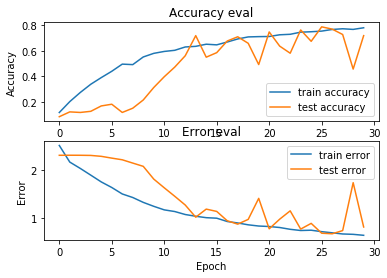

In [121]:
plot_history(history)

In [119]:
model.save("CNN-digit-mfcc-sw-new-test")

In [122]:
tf.reset_default_graph()

# Train with mfccs+digit classification #trimmed

In [94]:
#train the CNN
history=model.fit(X_train,y_train,validation_data=(X_validation,y_validation),batch_size=32,epochs=30)

Train on 1800 samples, validate on 450 samples
Epoch 1/10
1800/1800 [==============================] - 7s 4ms/sample - loss: 2.8158 - acc: 0.1378 - val_loss: 2.8072 - val_acc: 0.1533
Epoch 2/10
1800/1800 [==============================] - 6s 3ms/sample - loss: 2.2254 - acc: 0.2267 - val_loss: 2.2496 - val_acc: 0.2067s - loss
Epoch 3/10
1800/1800 [==============================] - 6s 3ms/sample - loss: 1.8824 - acc: 0.3278 - val_loss: 1.9167 - val_acc: 0.3267
Epoch 4/10
1800/1800 [==============================] - 6s 3ms/sample - loss: 1.6470 - acc: 0.4200 - val_loss: 1.6619 - val_acc: 0.4489
Epoch 5/10
1800/1800 [==============================] - 6s 3ms/sample - loss: 1.4766 - acc: 0.4806 - val_loss: 1.4311 - val_acc: 0.5622
Epoch 6/10
1800/1800 [==============================] - 6s 3ms/sample - loss: 1.3379 - acc: 0.5550 - val_loss: 1.2536 - val_acc: 0.6222
Epoch 7/10
1800/1800 [==============================] - 6s 3ms/sample - loss: 1.2528 - acc: 0.5728 - val_loss: 1.1308 - val_acc: 

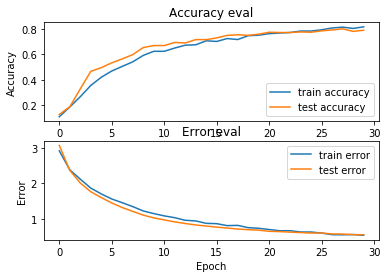

In [38]:
plot_history(history)

In [59]:
model.save("CNN-digit-mfcc-sw-new")

In [95]:
#Evaluate the CNN on the test set-mel specaugment and not mel test set only
test_error,test_accuracy=model.evaluate(X_test,y_test,verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))

750/750 [==============================] - 0s 534us/sample - loss: 0.8422 - acc: 0.7267
Accuracy on test set is: 0.7266666889190674


In [81]:
#Evaluate the CNN on the test set-mel specaugment and not mel test set only
test_error,test_accuracy=model.evaluate(X_test,y_test,verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))

750/750 [==============================] - 0s 626us/sample - loss: 0.9289 - acc: 0.6987
Accuracy on test set is: 0.6986666917800903


# Final

In [79]:
#load model
model_load = keras.models.load_model("CNN-genre-mfcc-2-new")

In [80]:
#Evaluate the CNN on the test set-mel specaugment and not mel test set only
test_error,test_accuracy=model_load.evaluate(X_test,y_test,verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))

750/750 [==============================] - 1s 1ms/sample - loss: 5.2536 - acc: 0.2093
Accuracy on test set is: 0.20933333039283752


In [81]:
history_load_2=model_load.fit(X_train,y_train,validation_data=(X_validation,y_validation),batch_size=32,epochs=30)

Train on 1800 samples, validate on 450 samples
Epoch 1/30
1800/1800 [==============================] - 5s 3ms/sample - loss: 1.6938 - acc: 0.4511 - val_loss: 2.4985 - val_acc: 0.4956
Epoch 2/30
1800/1800 [==============================] - 4s 2ms/sample - loss: 0.8161 - acc: 0.6900 - val_loss: 1.0469 - val_acc: 0.6711
Epoch 3/30
1800/1800 [==============================] - 4s 2ms/sample - loss: 0.6113 - acc: 0.7733 - val_loss: 0.8393 - val_acc: 0.7222
Epoch 4/30
1800/1800 [==============================] - 4s 2ms/sample - loss: 0.5158 - acc: 0.8178 - val_loss: 0.7048 - val_acc: 0.7556
Epoch 5/30
1800/1800 [==============================] - 4s 2ms/sample - loss: 0.4160 - acc: 0.8406 - val_loss: 0.5222 - val_acc: 0.7933
Epoch 6/30
1800/1800 [==============================] - 4s 2ms/sample - loss: 0.4181 - acc: 0.8400 - val_loss: 0.5331 - val_acc: 0.8156
Epoch 7/30
1800/1800 [==============================] - 4s 2ms/sample - loss: 0.3461 - acc: 0.8667 - val_loss: 0.4803 - val_acc: 0.8333
E

In [44]:
#Evaluate the CNN on the test set-mel specaugment and not mel test set only
test_error,test_accuracy=model_load_2.evaluate(X_test,y_test,verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))

750/750 [==============================] - 0s 396us/sample - loss: 0.4121 - acc: 0.8880
Accuracy on test set is: 0.8880000114440918


In [60]:
#load model
model_load_en_pu = keras.models.load_model("CNN-digit-mfcc-en-pu-3-new")

In [61]:
#Evaluate the CNN on the test set-mel specaugment and not mel test set only
test_error,test_accuracy=model_load_en_pu.evaluate(X_test,y_test,verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))

750/750 [==============================] - 1s 1ms/sample - loss: 4.0597 - acc: 0.2000
Accuracy on test set is: 0.20000000298023224


In [83]:
history_load_pu=model_load_pu.fit(X_train,y_train,validation_data=(X_validation,y_validation),batch_size=32,epochs=30)

Train on 1800 samples, validate on 450 samples
Epoch 1/30
1800/1800 [==============================] - 6s 4ms/sample - loss: 1.9219 - acc: 0.3839 - val_loss: 1.3518 - val_acc: 0.5044
Epoch 2/30
1800/1800 [==============================] - 5s 3ms/sample - loss: 1.2428 - acc: 0.5467 - val_loss: 1.1393 - val_acc: 0.5778
Epoch 3/30
1800/1800 [==============================] - 5s 3ms/sample - loss: 1.0549 - acc: 0.6322 - val_loss: 0.9652 - val_acc: 0.6533
Epoch 4/30
1800/1800 [==============================] - 5s 3ms/sample - loss: 0.9619 - acc: 0.6578 - val_loss: 0.8971 - val_acc: 0.6489
Epoch 5/30
1800/1800 [==============================] - 5s 3ms/sample - loss: 0.8936 - acc: 0.6783 - val_loss: 0.7796 - val_acc: 0.7267
Epoch 6/30
1800/1800 [==============================] - 5s 3ms/sample - loss: 0.8173 - acc: 0.7128 - val_loss: 0.7400 - val_acc: 0.7356
Epoch 7/30
1800/1800 [==============================] - 5s 3ms/sample - loss: 0.7653 - acc: 0.7350 - val_loss: 0.7275 - val_acc: 0.7267
E

In [84]:
#Evaluate the CNN on the test set-mel specaugment and not mel test set only
test_error,test_accuracy=model_load_pu.evaluate(X_test,y_test,verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))

750/750 [==============================] - 0s 540us/sample - loss: 0.4451 - acc: 0.8400
Accuracy on test set is: 0.8399999737739563


In [55]:
model_load_en_pu.save("CNN-digit-mfcc-en-pu-sw-1-new")

In [30]:
#load model
model_load_gu_en_sw = keras.models.load_model("CNN-digit-mfcc-pu-en-sw-3-new")

In [31]:
#Evaluate the CNN on the test set-mel specaugment and not mel test set only
test_error,test_accuracy=model_load_gu_en_sw.evaluate(X_test,y_test,verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))

750/750 [==============================] - 1s 853us/sample - loss: 0.4695 - acc: 0.8347
Accuracy on test set is: 0.8346666693687439


# Train with mfccs+digit classification #trimmed# Pre-trained Gujarati model

In [8]:
#load model
model_load_gu = keras.models.load_model("CNN-digit-mfcc-pu-new")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
#Evaluate the CNN on the test set-mel specaugment and not mel test set only
test_error,test_accuracy=model_load_gu.evaluate(X_test,y_test,verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))

750/750 [==============================] - 0s 564us/sample - loss: 3.2868 - acc: 0.1640
Accuracy on test set is: 0.164000004529953


In [67]:
history_load_gu=model_load_gu.fit(X_train,y_train,validation_data=(X_validation,y_validation),batch_size=32,epochs=30)

Train on 1800 samples, validate on 450 samples
Epoch 1/30
1800/1800 [==============================] - 5s 3ms/sample - loss: 1.8833 - acc: 0.4078 - val_loss: 1.3784 - val_acc: 0.5400
Epoch 2/30
1800/1800 [==============================] - 4s 2ms/sample - loss: 1.2209 - acc: 0.5683 - val_loss: 1.0178 - val_acc: 0.6489
Epoch 3/30
1800/1800 [==============================] - 4s 2ms/sample - loss: 1.0701 - acc: 0.6311 - val_loss: 0.8900 - val_acc: 0.6956
Epoch 4/30
1800/1800 [==============================] - 4s 2ms/sample - loss: 0.9556 - acc: 0.6622 - val_loss: 0.7881 - val_acc: 0.7422
Epoch 5/30
1800/1800 [==============================] - 4s 2ms/sample - loss: 0.8461 - acc: 0.7167 - val_loss: 0.7279 - val_acc: 0.7556
Epoch 6/30
1800/1800 [==============================] - 4s 2ms/sample - loss: 0.8184 - acc: 0.7117 - val_loss: 0.7043 - val_acc: 0.7578
Epoch 7/30
1800/1800 [==============================] - 4s 2ms/sample - loss: 0.7619 - acc: 0.7378 - val_loss: 0.6896 - val_acc: 0.7578
E

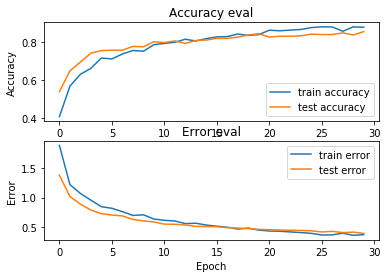

In [68]:
plot_history(history_load_gu)

In [69]:
#Evaluate the CNN on the test set-mel specaugment and not mel test set only
test_error,test_accuracy=model_load_gu.evaluate(X_test,y_test,verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))

750/750 [==============================] - 0s 418us/sample - loss: 0.4313 - acc: 0.8547
Accuracy on test set is: 0.8546666502952576


# Train with mfccs+digit classification #trimmed# Pre-trained english model

In [60]:
#load model
model_load = keras.models.load_model("CNN-digit-mfcc-en-new")

In [61]:
#Evaluate the CNN on the test set-mel specaugment and not mel test set only
test_error,test_accuracy=model_load.evaluate(X_test,y_test,verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))

750/750 [==============================] - ETA: 0s - loss: 5.2587 - acc: 0.157 - 1s 1ms/sample - loss: 5.2226 - acc: 0.1573
Accuracy on test set is: 0.15733332931995392


In [62]:
history_load=model_load.fit(X_train,y_train,validation_data=(X_validation,y_validation),batch_size=32,epochs=30)

Train on 1800 samples, validate on 450 samples
Epoch 1/30
1800/1800 [==============================] - 5s 3ms/sample - loss: 2.2858 - acc: 0.3144 - val_loss: 1.9353 - val_acc: 0.3600
Epoch 2/30
1800/1800 [==============================] - 4s 2ms/sample - loss: 1.3817 - acc: 0.4883 - val_loss: 1.2414 - val_acc: 0.5178
Epoch 3/30
1800/1800 [==============================] - 4s 2ms/sample - loss: 1.1637 - acc: 0.5717 - val_loss: 1.0383 - val_acc: 0.5956
Epoch 4/30
1800/1800 [==============================] - 4s 2ms/sample - loss: 1.0373 - acc: 0.6111 - val_loss: 0.9250 - val_acc: 0.6422
Epoch 5/30
1800/1800 [==============================] - 4s 2ms/sample - loss: 0.9574 - acc: 0.6383 - val_loss: 0.8315 - val_acc: 0.6756
Epoch 6/30
1800/1800 [==============================] - 4s 2ms/sample - loss: 0.8829 - acc: 0.6800 - val_loss: 0.7757 - val_acc: 0.7000
Epoch 7/30
1800/1800 [==============================] - 4s 2ms/sample - loss: 0.8200 - acc: 0.7033 - val_loss: 0.7460 - val_acc: 0.7222
E

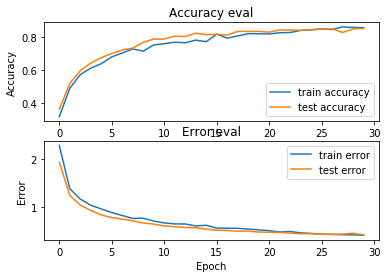

In [63]:
plot_history(history_load)

In [64]:
#Evaluate the CNN on the test set-mel specaugment and not mel test set only
test_error,test_accuracy=model_load.evaluate(X_test,y_test,verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))

750/750 [==============================] - 0s 403us/sample - loss: 0.4510 - acc: 0.8453
Accuracy on test set is: 0.8453333377838135


# Train with mfccs+gender classification

In [42]:
#train the CNN
history=model.fit(X_train,y_train,validation_data=(X_validation,y_validation),batch_size=32,epochs=30)

Train on 1800 samples, validate on 450 samples
Epoch 1/30
1800/1800 [==============================] - 10s 5ms/sample - loss: 0.7611 - acc: 0.6189 - val_loss: 0.7571 - val_acc: 0.6400
Epoch 2/30
1800/1800 [==============================] - 9s 5ms/sample - loss: 0.5072 - acc: 0.7611 - val_loss: 0.5450 - val_acc: 0.6867
Epoch 3/30
1800/1800 [==============================] - 9s 5ms/sample - loss: 0.4062 - acc: 0.8194 - val_loss: 0.4637 - val_acc: 0.7933
Epoch 4/30
1800/1800 [==============================] - 9s 5ms/sample - loss: 0.3443 - acc: 0.8411 - val_loss: 0.3894 - val_acc: 0.8267
Epoch 5/30
1800/1800 [==============================] - 9s 5ms/sample - loss: 0.3119 - acc: 0.8672 - val_loss: 0.3490 - val_acc: 0.8511
Epoch 6/30
1800/1800 [==============================] - 9s 5ms/sample - loss: 0.2693 - acc: 0.8806 - val_loss: 0.3045 - val_acc: 0.8667
Epoch 7/30
1800/1800 [==============================] - 9s 5ms/sample - loss: 0.2350 - acc: 0.9044 - val_loss: 0.3011 - val_acc: 0.8711


In [43]:
model.save("CNN-gender-mfcc")

In [44]:
#Evaluate the CNN on the test set-mel specaugment and not mel test set only
test_error,test_accuracy=model.evaluate(X_test,y_test,verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))

750/750 [==============================] - 1s 821us/sample - loss: 0.1700 - acc: 0.9320
Accuracy on test set is: 0.9319999814033508


# Train with mfccs+digit classification

In [14]:
#train the CNN
history=model.fit(X_train,y_train,validation_data=(X_validation,y_validation),batch_size=32,epochs=30)

Train on 1800 samples, validate on 450 samples
Epoch 1/30
1800/1800 [==============================] - 10s 6ms/sample - loss: 2.6302 - acc: 0.1244 - val_loss: 2.4814 - val_acc: 0.0956
Epoch 2/30
1800/1800 [==============================] - 9s 5ms/sample - loss: 2.0984 - acc: 0.2561 - val_loss: 2.2120 - val_acc: 0.1756
Epoch 3/30
1800/1800 [==============================] - 9s 5ms/sample - loss: 1.8566 - acc: 0.3406 - val_loss: 2.0176 - val_acc: 0.3222
Epoch 4/30
1800/1800 [==============================] - 9s 5ms/sample - loss: 1.6658 - acc: 0.3811 - val_loss: 1.8079 - val_acc: 0.4111
Epoch 5/30
1800/1800 [==============================] - 9s 5ms/sample - loss: 1.5228 - acc: 0.4550 - val_loss: 1.6093 - val_acc: 0.5089
Epoch 6/30
1800/1800 [==============================] - 11s 6ms/sample - loss: 1.3814 - acc: 0.5239 - val_loss: 1.4253 - val_acc: 0.5622
Epoch 7/30
1800/1800 [==============================] - 10s 5ms/sample - loss: 1.2671 - acc: 0.5572 - val_loss: 1.2697 - val_acc: 0.588

In [ ]:
model.save("CNN-digit-mfcc")

In [15]:
#Evaluate the CNN on the test set-mel specaugment and not mel test set only
test_error,test_accuracy=model.evaluate(X_test,y_test,verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))

750/750 [==============================] - 1s 814us/sample - loss: 0.6079 - acc: 0.7760
Accuracy on test set is: 0.7760000228881836


# Train with mfccs

In [14]:
#train the CNN
history=model.fit(X_train,y_train,validation_data=(X_validation,y_validation),batch_size=32,epochs=30)

Train on 1800 samples, validate on 450 samples
Epoch 1/30
1800/1800 [==============================] - 4s 2ms/sample - loss: 2.7451 - acc: 0.1211 - val_loss: 2.3583 - val_acc: 0.1578
Epoch 2/30
1800/1800 [==============================] - 3s 2ms/sample - loss: 2.1610 - acc: 0.2256 - val_loss: 2.1771 - val_acc: 0.2444
Epoch 3/30
1800/1800 [==============================] - 3s 2ms/sample - loss: 1.8901 - acc: 0.3267 - val_loss: 1.9827 - val_acc: 0.3933
Epoch 4/30
1800/1800 [==============================] - 3s 2ms/sample - loss: 1.6707 - acc: 0.4228 - val_loss: 1.7463 - val_acc: 0.5267
Epoch 5/30
1800/1800 [==============================] - 3s 2ms/sample - loss: 1.4768 - acc: 0.5233 - val_loss: 1.5023 - val_acc: 0.6156
Epoch 6/30
1800/1800 [==============================] - 3s 2ms/sample - loss: 1.3241 - acc: 0.5722 - val_loss: 1.2610 - val_acc: 0.7111
Epoch 7/30
1800/1800 [==============================] - 3s 2ms/sample - loss: 1.1826 - acc: 0.6217 - val_loss: 1.0616 - val_acc: 0.8044
E

In [15]:
#Evaluate the CNN on the test set-mfcc
test_error,test_accuracy=model.evaluate(X_test,y_test,verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))

750/750 [==============================] - 0s 327us/sample - loss: 0.1623 - acc: 0.9653
Accuracy on test set is: 0.9653333425521851


# Train with specAugment

In [19]:
#train the CNN
history_spec=model.fit(X_train,y_train,validation_data=(X_validation,y_validation),batch_size=32,epochs=30)

Train on 1800 samples, validate on 450 samples
Epoch 1/30
1800/1800 [==============================] - 87s 48ms/sample - loss: 2.5684 - acc: 0.1461 - val_loss: 2.3019 - val_acc: 0.1111
Epoch 2/30
1800/1800 [==============================] - 80s 45ms/sample - loss: 2.1483 - acc: 0.2406 - val_loss: 2.3061 - val_acc: 0.1022
Epoch 3/30
1800/1800 [==============================] - 96s 53ms/sample - loss: 1.9968 - acc: 0.2917 - val_loss: 2.3052 - val_acc: 0.1022
Epoch 4/30
1800/1800 [==============================] - 99s 55ms/sample - loss: 1.8772 - acc: 0.3411 - val_loss: 2.3044 - val_acc: 0.1178
Epoch 5/30
1800/1800 [==============================] - 100s 55ms/sample - loss: 1.7800 - acc: 0.3706 - val_loss: 2.3013 - val_acc: 0.1311
Epoch 6/30
1800/1800 [==============================] - 98s 55ms/sample - loss: 1.6610 - acc: 0.4244 - val_loss: 2.3019 - val_acc: 0.1444
Epoch 7/30
1800/1800 [==============================] - 94s 52ms/sample - loss: 1.5850 - acc: 0.4422 - val_loss: 2.2646 - va

In [20]:
model.save("CNN-digit-mel")

In [21]:
#Evaluate the CNN on the test set-mel specaugment and not mel test set only
test_error,test_accuracy=model.evaluate(X_test,y_test,verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))

750/750 [==============================] - 5s 6ms/sample - loss: 2.5192 - acc: 0.2800
Accuracy on test set is: 0.2800000011920929


In [24]:
model.save("CNN-digit-mfcc")

# Train with stft

In [40]:
#train the CNN
history2=model.fit(X_train,y_train,validation_data=(X_validation,y_validation),batch_size=32,epochs=30)

Train on 1800 samples, validate on 450 samples
Epoch 1/30
1800/1800 [==============================] - 89s 49ms/sample - loss: 2.3413 - acc: 0.1533 - val_loss: 2.3035 - val_acc: 0.1022
Epoch 2/30
1800/1800 [==============================] - 95s 53ms/sample - loss: 2.1939 - acc: 0.1906 - val_loss: 2.2990 - val_acc: 0.1133
Epoch 3/30
1800/1800 [==============================] - 91s 51ms/sample - loss: 2.1440 - acc: 0.2211 - val_loss: 2.3199 - val_acc: 0.1156
Epoch 4/30
1800/1800 [==============================] - 87s 48ms/sample - loss: 2.0545 - acc: 0.2506 - val_loss: 2.3349 - val_acc: 0.1133
Epoch 5/30
1800/1800 [==============================] - 94s 52ms/sample - loss: 1.9124 - acc: 0.3089 - val_loss: 2.4185 - val_acc: 0.1133
Epoch 6/30
1800/1800 [==============================] - 98s 54ms/sample - loss: 1.7555 - acc: 0.3561 - val_loss: 2.5074 - val_acc: 0.1244
Epoch 7/30
1800/1800 [==============================] - 95s 53ms/sample - loss: 1.6225 - acc: 0.4228 - val_loss: 2.5929 - val

In [41]:
model.save("CNN-digit-stft")

In [42]:
#Evaluate the CNN on the test set--stft
test_error,test_accuracy=model.evaluate(X_test,y_test,verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))

750/750 [==============================] - 5s 7ms/sample - loss: 0.2878 - acc: 0.9120
Accuracy on test set is: 0.9120000004768372


In [49]:
#Evaluate the CNN on the test set--stft
test_error,test_accuracy=model.evaluate(X_test,y_test,verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))

750/750 [==============================] - 6s 8ms/sample - loss: 0.2053 - acc: 0.9347
Accuracy on test set is: 0.9346666932106018


In [21]:
#make prediction on the sample
X=X_train[49]
y=y_train[49]
predict(model,X,y)

Expected index: 7, Predicted index: [7]


In [48]:
y_train[49].shape

()

In [43]:
#make prediction on the sample
X=X_train[49]
y=y_train[49]
predict(model,X,y)

Expected index: 4, Predicted index: [4]


In [120]:
def plot_history(history):
    fig,axs=plt.subplots(2)
    
    #create accuracy suplot
    axs[0].plot(history.history["acc"],label="train accuracy")
    axs[0].plot(history.history["val_acc"],label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")
    
    #create accuracy suplot
    axs[1].plot(history.history["loss"],label="train error")
    axs[1].plot(history.history["val_loss"],label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    plt.show()

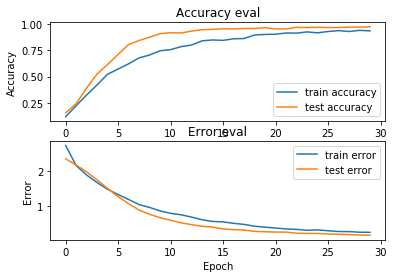

In [23]:
#mfcc
plot_history(history)

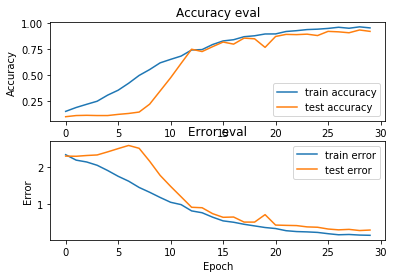

In [44]:
#stft
plot_history(history2)

In [46]:
#train the CNN
history3=model.fit(X_train,y_train,validation_data=(X_validation,y_validation),batch_size=32,epochs=15)

Train on 1800 samples, validate on 450 samples
Epoch 1/15
1800/1800 [==============================] - 88s 49ms/sample - loss: 0.1309 - acc: 0.9611 - val_loss: 0.2496 - val_acc: 0.9467
Epoch 2/15
1800/1800 [==============================] - 81s 45ms/sample - loss: 0.1171 - acc: 0.9722 - val_loss: 0.2374 - val_acc: 0.9511
Epoch 3/15
1800/1800 [==============================] - 83s 46ms/sample - loss: 0.1066 - acc: 0.9783 - val_loss: 0.3138 - val_acc: 0.9044
Epoch 4/15
1800/1800 [==============================] - 88s 49ms/sample - loss: 0.1036 - acc: 0.9739 - val_loss: 0.2523 - val_acc: 0.9200
Epoch 5/15
1800/1800 [==============================] - 95s 53ms/sample - loss: 0.0833 - acc: 0.9806 - val_loss: 0.2534 - val_acc: 0.9289
Epoch 6/15
1800/1800 [==============================] - 96s 53ms/sample - loss: 0.0849 - acc: 0.9772 - val_loss: 0.2498 - val_acc: 0.9356
Epoch 7/15
1800/1800 [==============================] - 97s 54ms/sample - loss: 0.0853 - acc: 0.9822 - val_loss: 0.2209 - val

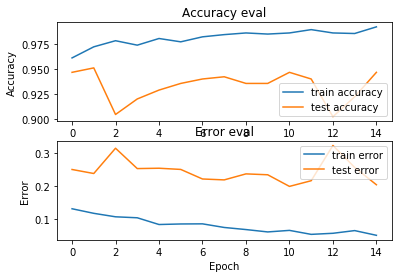

In [47]:
plot_history(history3) #

# Train with the generated data-stft

In [25]:
from tensorflow.keras.layers import Input,Conv2D,ReLU,BatchNormalization,Flatten,Dense,Reshape,Conv2DTranspose,Activation,Lambda
import os 
import pickle
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras import Model
import librosa
import librosa.display

C:\Users\Alexander\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Users\Alexander\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_

In [8]:
#Define the autoencoder
class Autoencoder:
    
    def __init__(self,input_shape,
                conv_filters,
                conv_kernels,
                conv_strides,
                latent_space_dim):
        
        self.input_shape=input_shape  # [28 , 28 , 1]
        self.conv_filters=conv_filters #[2 , 4 , 8]
        self.conv_kernels=conv_kernels #[3 , 5 , 3]
        self.conv_strides=conv_strides #[1 , 2 , 2]
        self.latent_space_dim=latent_space_dim # 2
        
        self.encoder=None
        self.decoder=None
        self.model=None
        self._model_input=None
        
        self._num_conv_layers=len(conv_filters)
        self._shape_before_bottleneck=None
        
        self._build()
        
    def summary(self):
        self.encoder.summary()
        self.decoder.summary()
        self.model.summary()
        
    def compile(self,learning_rate=0.0001):
        optimizer=Adam(lr=learning_rate)
        mse_loss=MeanSquaredError()
        self.model.compile(optimizer,loss=mse_loss)
        
    def train(self, x_train,x_val,batch_size,num_epochs):
        history=self.model.fit(x_train,
                       x_train,validation_data=(x_val,x_val),
                       batch_size=batch_size,
                      epochs=num_epochs,
                      shuffle=False)
        return history
        
    def save(self,save_folder="."):
        self._create_folder_if_doesnt_exist(save_folder)
        self._save_parameters(save_folder)
        self._save_weights(save_folder)
    
    def load_weights(self,weights_path):
        self.model.load_weights(weights_path)
        
    def reconstruct(self,images):
        latent_representations=self.encoder.predict(images)
        reconstructed_images=self.decoder.predict(latent_representations)
        return reconstructed_images,latent_representations
    
    @classmethod
    def load(cls,save_folder="."):
        parameters_path=os.path.join(save_folder,"parameters.pkl")
        with open(parameters_path,"rb") as f:
            parameters=pickle.load(f)
        autoencoder=Autoencoder(*parameters)
        weights_path=os.path.join(save_folder,"weights.h5")
        autoencoder.load_weights(weights_path)
        
        return autoencoder
    
    def _create_folder_if_doesnt_exist(self,folder):
        if not os.path.exists(folder):
            os.makedirs(folder)
    
    def _save_parameters(self,save_folder):
        parameters =[
            self.input_shape,
            self.conv_filters,
            self.conv_kernels,
            self.conv_strides,
            self.latent_space_dim
        ]
        save_path=os.path.join(save_folder,"parameters.pkl")
        with open(save_path,"wb") as f:
            pickle.dump(parameters,f)
        
    def _save_weights(self,save_folder):
        save_path=os.path.join(save_folder,"weights.h5")
        self.model.save_weights(save_path)
        
    def _build(self):
        self._build_encoder()
        self._build_decoder()
        self._build_autoencoder()
        
    def _build_autoencoder(self):
        model_input=self._model_input
        model_output=self.decoder(self.encoder(model_input))
        self.model=Model(model_input,model_output,name="autoencoder")
        
    def _build_decoder(self):
        decoder_input=self._add_decoder_input()
        dense_layer=self._add_dense_layer(decoder_input)
        reshape_layer=self._add_reshape_layer(dense_layer)
        conv_transpose_layers=self._add_conv_transpose_layers(reshape_layer)
        decoder_output=self._add_decoder_output(conv_transpose_layers)
        self.decoder=Model(decoder_input,decoder_output,name="decoder")
        
    def _add_decoder_input(self):
        return Input(shape=(self.latent_space_dim,),name="decoder_input")
    
    def _add_dense_layer(self,decoder_input):
        num_neurons=np.prod(self._shape_before_bottleneck) #[1,2,4] => 8
        dense_layer=Dense(num_neurons,name="decoder_dense")(decoder_input)
        return dense_layer
    
    def _add_reshape_layer(self,dense_layer):
        return Reshape(self._shape_before_bottleneck)(dense_layer)
    
    def _add_conv_transpose_layers(self,x):
        """Add con transpose blocks."""
        #loop through all the conv layers in reverse order and stop at first
        # layer
        for layer_index in reversed(range(1,self._num_conv_layers)):
            # [1, 2] -> [2,1]
            x=self._add_conv_transpose_layer(layer_index,x)
        return x
    
    def _add_conv_transpose_layer(self,layer_index,x):
        layer_num=self._num_conv_layers-layer_index
        conv_transpose_layer=Conv2DTranspose(
            filters=self.conv_filters[layer_index],
            kernel_size=self.conv_kernels[layer_index],
            strides=self.conv_strides[layer_index],
            padding="same",
            name=f"decoder_conv_transpose_layer_{layer_num}"
        )
        x=conv_transpose_layer(x)
        x=ReLU(name=f"decoder_relu_{layer_num}")(x)
        x=BatchNormalization(name=f"decoder_bn_{layer_num}")(x)
        
        return x
    
    def _add_decoder_output(self,x):
        conv_transpose_layer=Conv2DTranspose(
            filters=1, #[24,24,1]
            kernel_size=self.conv_kernels[0],
            strides=self.conv_strides[0],
            padding="same",
            name=f"decoder_conv_transpose_layer_{self._num_conv_layers}"
        )
        x=conv_transpose_layer(x)
        output_layer=Activation("sigmoid",name="sigmoid_layer")(x)
        
        return output_layer
    
    def _build_encoder(self):
        encoder_input=self._add_encoder_input()
        conv_layers=self._add_conv_layers(encoder_input)
        bottleneck=self._add_bottleneck(conv_layers)
        self._model_input=encoder_input
        self.encoder=Model(encoder_input,bottleneck, name="encoder")
        
    def _add_encoder_input(self):
        return Input(shape=self.input_shape,name="encoder_input")
    
    def _add_conv_layers(self,encoder_input):
        
        x=encoder_input
        
        for layer_index in range(self._num_conv_layers):
            x=self._add_conv_layer(layer_index,x)
        return x
    
    def _add_conv_layer(self,layer_index,x):
        layer_number=layer_index+1
        conv_layer =Conv2D(
            filters=self.conv_filters[layer_index],
            kernel_size=self.conv_kernels[layer_index],
            strides=self.conv_strides[layer_index],
            padding="same",
            name=f"encoder_conv_layer_{layer_index+1}")
        
        x=conv_layer(x)
        x=ReLU(name=f"encoder_relu_{layer_index+1}")(x)
        x=BatchNormalization(name=f"encoder_bn_{layer_number}")(x)
        
        return x
    
    def _add_bottleneck(self,x):
        """Flatten data and add bottleneck (Dense layer)"""
        self._shape_before_bottleneck=K.int_shape(x)[1:] # [2,7,7,32]
        
        x=Flatten()(x)
        x=Dense(self.latent_space_dim,name="encoder_output")(x)
        
        return x

In [9]:
#Load the original data
#load data
def load_data(dataset_path):
    with open(dataset_path,"r") as fp:
        data=json.load(fp)  #load the dictionary from the file
        
    # convert list into numpy array
    inputs=np.array(data["stft"])
    targets=np.array(data["labels"])
    
    return inputs,targets

def prepare_datasets(test_size,validation_size):
    #load data
    X,y=load_data(DATASET_PATH)
    print(X.shape)
    #create train/test split
    #split the data into train and test set
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=test_size)
    #create train/validation split
    X_train,X_validation,y_train,y_validation=train_test_split(X_train,y_train,test_size=validation_size)
    #3d array -> (130,13,1)
    X_train=X_train[...,np.newaxis] #4d array-> (num_samples,130,13,1)
    X_validation=X_validation[...,np.newaxis]
    X_test=X_test[...,np.newaxis]
    
    
    return X_train,X_validation,X_test,y_train,y_validation,y_test

if __name__=="__main__":
    #inputs,targets=load_data(DATASET_PATH)
    X_train,X_validation,X_test,y_train,y_validation,y_test=prepare_datasets(0.25,0.2)

(3000, 64, 256)


In [11]:
X_train.shape

(1800, 64, 256, 1)

In [32]:
#Load the autoencoder model
autoencoder=Autoencoder.load("autoencoder_50")

#Generate new data from X_train, X_validation
reconstructed_images_train, _ = autoencoder.reconstruct(X_train)
reconstructed_images_validation, _ = autoencoder.reconstruct(X_validation)



In [45]:
#build the CNN net
input_shape=(reconstructed_images_train.shape[1],reconstructed_images_train.shape[2],reconstructed_images_train.shape[3])
model=build_model(input_shape)

#compile the network
optimizer=keras.optimizers.Adam(lr=0.00001)  #0.0001
model.compile(optimizer=optimizer,
             loss="sparse_categorical_crossentropy",
             metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 62, 254, 32)       320       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 31, 127, 32)       0         
_________________________________________________________________
batch_normalization_v1_18 (B (None, 31, 127, 32)       128       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 29, 125, 32)       9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 15, 63, 32)        0         
_________________________________________________________________
batch_normalization_v1_19 (B (None, 15, 63, 32)        128       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 62, 32)        4128      
__________

In [41]:
#Train the model using only the generated data while using the original data for validation, and testing (Yenyewe)
history_gen_1=model.fit(reconstructed_images_train,y_train,validation_data=(X_validation,y_validation),batch_size=32,epochs=30)

Train on 1800 samples, validate on 450 samples
Epoch 1/30
1800/1800 [==============================] - 82s 46ms/sample - loss: 2.3796 - acc: 0.1250 - val_loss: 2.3141 - val_acc: 0.1222
Epoch 2/30
1800/1800 [==============================] - 82s 45ms/sample - loss: 2.2143 - acc: 0.1783 - val_loss: 2.4086 - val_acc: 0.1111
Epoch 3/30
1800/1800 [==============================] - 82s 45ms/sample - loss: 2.1835 - acc: 0.1822 - val_loss: 2.5268 - val_acc: 0.0911
Epoch 4/30
1800/1800 [==============================] - 83s 46ms/sample - loss: 2.1117 - acc: 0.2283 - val_loss: 2.6499 - val_acc: 0.0911
Epoch 5/30
1800/1800 [==============================] - 81s 45ms/sample - loss: 1.9882 - acc: 0.2789 - val_loss: 3.1325 - val_acc: 0.0911
Epoch 6/30
1800/1800 [==============================] - 81s 45ms/sample - loss: 1.8882 - acc: 0.3222 - val_loss: 3.4899 - val_acc: 0.0911
Epoch 7/30
1800/1800 [==============================] - 81s 45ms/sample - loss: 1.8141 - acc: 0.3550 - val_loss: 3.6356 - val

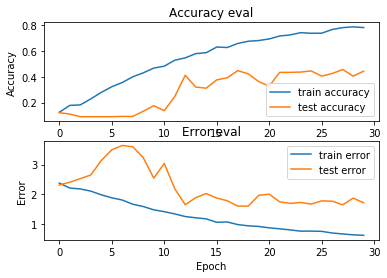

In [44]:
plot_history(history_gen_1)

In [42]:
#Evaluate the CNN on the test set--stft
test_error,test_accuracy=model.evaluate(X_test,y_test,verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))

750/750 [==============================] - 5s 7ms/sample - loss: 1.6725 - acc: 0.4667
Accuracy on test set is: 0.46666666865348816


In [46]:
#Train the model using only the generated data while using the original data for validation, and testing
history_gen_2=model.fit(reconstructed_images_train,y_train,validation_data=(X_validation,y_validation),batch_size=32,epochs=30)

Train on 1800 samples, validate on 450 samples
Epoch 1/30
1800/1800 [==============================] - 81s 45ms/sample - loss: 2.7118 - acc: 0.1244 - val_loss: 2.3146 - val_acc: 0.0933
Epoch 2/30
1800/1800 [==============================] - 81s 45ms/sample - loss: 2.4077 - acc: 0.1461 - val_loss: 2.3584 - val_acc: 0.0911
Epoch 3/30
1800/1800 [==============================] - 81s 45ms/sample - loss: 2.2848 - acc: 0.1789 - val_loss: 2.4072 - val_acc: 0.0911
Epoch 4/30
1800/1800 [==============================] - 81s 45ms/sample - loss: 2.2442 - acc: 0.1789 - val_loss: 2.4454 - val_acc: 0.0911
Epoch 5/30
1800/1800 [==============================] - 81s 45ms/sample - loss: 2.1864 - acc: 0.2011 - val_loss: 2.4591 - val_acc: 0.0911
Epoch 6/30
1800/1800 [==============================] - 82s 45ms/sample - loss: 2.1570 - acc: 0.2172 - val_loss: 2.4456 - val_acc: 0.0911
Epoch 7/30
1800/1800 [==============================] - 80s 45ms/sample - loss: 2.1275 - acc: 0.2306 - val_loss: 2.4200 - val

In [47]:
#Evaluate the CNN on the test set--stft
test_error,test_accuracy=model.evaluate(X_test,y_test,verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))

750/750 [==============================] - 5s 7ms/sample - loss: 2.2783 - acc: 0.1987
Accuracy on test set is: 0.19866666197776794


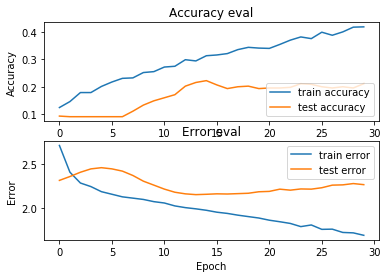

In [48]:
plot_history(history_gen_2)